In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from fastai.vision import *
from fastai import *
import matplotlib.pyplot as plt             
import cv2
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Flatten, MaxPool2D, ReLU
from keras.layers import Conv2D, BatchNormalization
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.image as mpimg
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
pathFold1 = '/content/drive/My Drive/Images Projet Final/train/Output train'
listUnfold1 = os.listdir(pathFold1)
for unfold2 in listUnfold1 :
  
    pathUnfold2 = pathFold1 + '/'+ unfold2 
    listImgToSlice = os.listdir(pathUnfold2) 
    print(unfold2 , " possède ", len(listImgToSlice), " éléments.")

Yoshi  possède  152  éléments.
Waluigi  possède  175  éléments.
Toad  possède  303  éléments.
Tiny Kong  possède  227  éléments.
Professor Layton  possède  67  éléments.
Pikachu  possède  281  éléments.
Phoenix Wright  possède  75  éléments.
Mario  possède  317  éléments.
Link  possède  317  éléments.
Luigi  possède  242  éléments.
Harmonie  possède  154  éléments.
Captain Falcon  possède  121  éléments.
Fox  possède  350  éléments.
Donkey Kong  possède  89  éléments.
Daisy  possède  175  éléments.


In [ ]:
pathFold1 = '/content/drive/My Drive/Images Projet Final/test/Output test'
listUnfold1 = os.listdir(pathFold1)
for unfold2 in listUnfold1 :
  if len(os.listdir(pathFold1+'/'+unfold2)) <200 : 
  
      pathUnfold2 = pathFold1 + '/'+ unfold2 +'/'
      listImgToSlice = os.listdir(pathUnfold2) 
      print(unfold2 , " possède ", len(listImgToSlice), " éléments.")
  
  
    

Captain Falcon  possède  53  éléments.
Daisy  possède  76  éléments.
Donkey Kong  possède  39  éléments.
Fox  possède  150  éléments.
Harmonie  possède  68  éléments.
Link  possède  136  éléments.
Luigi  possède  104  éléments.
Mario  possède  137  éléments.
Phoenix Wright  possède  33  éléments.
Pikachu  possède  121  éléments.
Professor Layton  possède  31  éléments.
Tiny Kong  possède  101  éléments.
Toad  possède  130  éléments.
Waluigi  possède  76  éléments.
Yoshi  possède  66  éléments.


In [ ]:
pathFold3 = '/content/drive/My Drive/Images Projet Final/test'
listUnfold3 = os.listdir(pathFold3)
for unfold4 in listUnfold3 :
  
    pathUnfold4 = pathFold3 + '/'+ unfold4 
    listImgToSlice = os.listdir(pathUnfold4) 
    print(unfold4 , " possède ", len(listImgToSlice), " éléments.")

Mario  possède  137  éléments.
Luigi  possède  104  éléments.
Yoshi  possède  62  éléments.
Link  possède  136  éléments.
Captain Falcon  possède  48  éléments.
Toad  possède  130  éléments.
Waluigi  possède  71  éléments.
Fox  possède  150  éléments.
Daisy  possède  71  éléments.
Harmonie  possède  63  éléments.
Professor Layton  possède  31  éléments.
Donkey Kong  possède  34  éléments.
Tiny Kong  possède  98  éléments.
Pikachu  possède  121  éléments.
Phoenix Wright  possède  30  éléments.
Output test  possède  9  éléments.


In [ ]:
pathFold3 = '/content/drive/My Drive/Images Projet Final/test'
listUnfold3 = os.listdir(pathFold3)
for unfold4 in listUnfold3 :
  if len(os.listdir(pathFold3+'/'+unfold4)) <100 : 
  
      pathUnfold4 = pathFold3 + '/'+ unfold4 +'/'+ 'output'
      listImgToSlice = os.listdir(pathUnfold4) 
      print(unfold4 , " possède ", len(listImgToSlice), " éléments.")

Yoshi  possède  66  éléments.
Captain Falcon  possède  53  éléments.
Waluigi  possède  76  éléments.
Daisy  possède  76  éléments.
Harmonie  possède  68  éléments.
Professor Layton  possède  31  éléments.
Donkey Kong  possède  39  éléments.
Tiny Kong  possède  101  éléments.
Phoenix Wright  possède  33  éléments.


**Modèle: CNN**

In [ ]:
# Liste des catégories d'images
class_names = ['Daisy', 'Yoshi', 'Harmonie', 'Waluigi', 'Professor Layton', 'Phoenix Wright', 'Donkey Kong', 'Captain Falcon', 
               'Luigi', 'Mario' , 'Link', 'Pikachu', 'Toad', 'Tiny Kong', 'Fox']
# Dico des Labels
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

#Création d'une fonction load_data qui permet de générer les échantillons de Train et Test contenant les images 
#et leurs labels
def load_data():
    
    #Chemin d'accès aux datasets seg_train seg_test - A MODIFIER
    datasets = ['/content/drive/My Drive/Images Projet Final/train/Output train', '/content/drive/My Drive/Images Projet Final/test/Output test']
    output = []
    size = (150,150)
    
    # Parcours des datasets
    for dataset in datasets:
        # Création de 2 listes images et labels
        # A COMPLETER
        
        images = []
        labels = []  
        
        # Parcours des sous-dossiers de chaque dossier 
        for folder in os.listdir(dataset):
            
            #Récupération du label (0, 1, 2,...) associé au sous-dossier folder à partir de class_names_label
            # A COMPLETER
            label = class_names_label[folder]
            
            # Parcours de chaque image dans chaque sous-dossier
            for file in tqdm((os.listdir(os.path.join(dataset, folder)))):
                
                # Récupération du chemin de l'image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Lecture de l'image avec Cv2
                # A COMPLETER
 
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                
 
                # Ajout de image dans la listes images et labels
                # A COMPLETER
                images.append(curr_img)
                labels.append(label)    
                images, labels = shuffle(images, labels)
        # Conversion des listes images et labels en numpy.array
        # A COMPLETER
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
                
        # Ajout d'images et labels à la liste output
        output.append((images, labels))
 
    return output

In [ ]:
# Création de (train_images, train_labels), (test_images, test_labels) à partir de la fonction load_data()
# A COMPLETER
(x_train, y_train), (x_test, y_test) = load_data()
# Mélanger aléatoirement le dataset de train à l'aide de la fonction `shuffle()`
# A COMPLETER
x_train, y_train = shuffle(x_train, y_train)


100%|██████████| 152/152 [00:07<00:00, 20.11it/s]

100%|██████████| 175/175 [00:03<00:00, 50.92it/s]

100%|██████████| 303/303 [00:01<00:00, 214.48it/s]

100%|██████████| 227/227 [00:17<00:00, 12.95it/s]

100%|██████████| 67/67 [00:00<00:00, 198.00it/s]

100%|██████████| 281/281 [00:01<00:00, 187.66it/s]

100%|██████████| 75/75 [00:00<00:00, 200.40it/s]

100%|██████████| 317/317 [00:02<00:00, 128.51it/s]

100%|██████████| 317/317 [00:02<00:00, 147.81it/s]

100%|██████████| 242/242 [00:01<00:00, 217.31it/s]

100%|██████████| 154/154 [00:05<00:00, 26.43it/s]

100%|██████████| 121/121 [00:00<00:00, 176.25it/s]

100%|██████████| 350/350 [00:02<00:00, 152.07it/s]

100%|██████████| 89/89 [00:01<00:00, 54.21it/s]

100%|██████████| 175/175 [00:06<00:00, 25.76it/s]

100%|██████████| 53/53 [00:00<00:00, 211.68it/s]

100%|██████████| 76/76 [00:03<00:00, 19.87it/s]

100%|██████████| 39/39 [00:10<00:00,  3.86it/s]

100%|██████████| 150/150 [00:36<00:00,  4.06it/s]

100%|██████████| 68/68 [00:22<00

In [ ]:
Train = (x_train.shape, y_train.shape)
Test = (x_test.shape, y_test.shape)
print(Train,Test)

((3045, 150, 150, 3), (3045,)) ((1321, 150, 150, 3), (1321,))


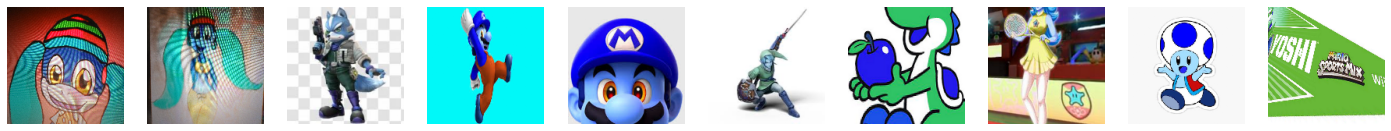

In [ ]:
plt.figure(figsize=(100,100))
for index, (image, label) in enumerate(zip(x_train[30:40],y_train[30:40])):
    plt.subplot(20, 40, index + 1)
    plt.imshow(image/255)
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.axis('off');
plt.show()

In [ ]:
x_train /= 255

x_test /= 255

print('x_train shape:', x_train.shape)

print('Number of images in x_train', x_train.shape[0])

print('Number of images in x_test', x_test.shape[0])

x_train shape: (3045, 150, 150, 3)
Number of images in x_train 3045
Number of images in x_test 1321


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


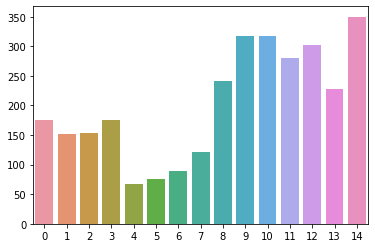

In [ ]:
import seaborn as sns
_, train_counts = np.unique(y_train, return_counts=True)
sns.barplot(_, train_counts)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder('/content/drive/My Drive/Images Projet Final/test/Output test/', test=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
data.classes

['Captain Falcon',
 'Daisy',
 'Donkey Kong',
 'Fox',
 'Harmonie',
 'Link',
 'Luigi',
 'Mario',
 'Phoenix Wright',
 'Pikachu',
 'Professor Layton',
 'Tiny Kong',
 'Toad',
 'Waluigi',
 'Yoshi']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

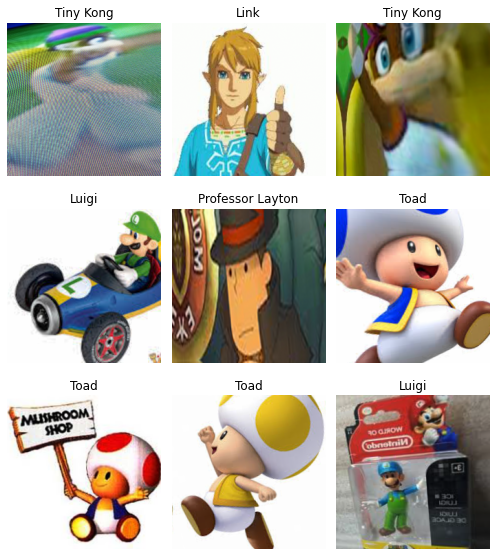

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
path = '/content/drive/My Drive/Images Projet Final/test'
tfms = get_transforms(do_flip=False)
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit(3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.757027,0.866128,0.781609,06:08
1,1.079158,0.587921,0.839080,06:06
2,0.771805,0.505551,0.877395,06:16


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [18]:
path = '/content/drive/My Drive/Images Projet Final/test/Output test'
tfms = get_transforms(do_flip=False)
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.757454,0.911398,0.773946,06:19
1,1.073286,0.660396,0.827586,06:13
2,0.747389,0.549043,0.858238,06:12


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


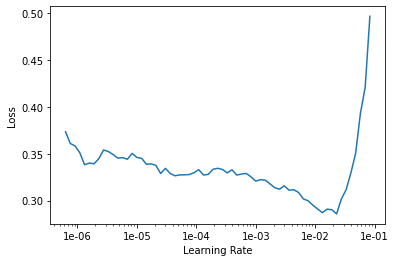

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.322369,0.539041,0.862069,08:58
1,0.290221,0.514736,0.862069,09:05
2,0.275009,0.514510,0.865900,09:14


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [21]:
preds,targs = learn.TTA()
accuracy(preds, targs).item()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

0.9003831148147583

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

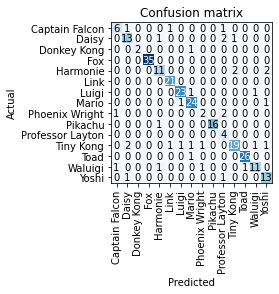

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
from keras.layers import MaxPooling2D
CNET = keras.Sequential() 

CNET.add(Conv2D(16, (5,5)))
CNET.add(Activation('relu'))
CNET.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNET.add(Conv2D(32,(5,5)))
CNET.add(Activation('relu'))
CNET.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNET.add(Flatten())
CNET.add(Dense(100))
CNET.add(Activation('sigmoid'))
CNET.add(Dense(10))
CNET.add(Activation('softmax'))

CNET.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

CNET.fit(x_train, y_train, epochs = 5)

Epoch 1/5


ValueError: ignored

In [ ]:
train_results = CNET.evaluate(x_train, y_train, verbose=1)
print(f'Train results - Loss: {train_results[0]} - Accuracy: {train_results[1]}%')
test_results = CONVNET.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
